###### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## This is a file to show how to deal with the data extracted from CMG for JD case.

In [2]:
##### Load your example csv file (shared with me via email)
df = pd.read_csv('../data/omv/JD_press_data.csv')

In [3]:
df

,Unnamed: 0,X,Y,Pressure_2024-Jan-01,Pressure_2026-Jan-01,Pressure_2028-Jan-01,Pressure_2030-Jan-01,Pressure_2032-Jan-01,Pressure_2034-Jan-01
0,0,555529.31,6714351.88,19091.6,19171.9,19314.7,19458.5,19610.2,19765.7
1,1,555078.70,6714390.50,19270.7,19351.0,19493.9,19637.6,19789.4,19944.9
2,2,554620.59,6714430.75,19466.7,19547.0,19689.9,19833.6,19985.4,20140.9
3,3,554158.45,6714472.00,19695.9,19776.3,19919.2,20063.0,20214.8,20370.3
4,4,553694.11,6714513.75,19881.1,19961.7,20104.6,20248.4,20400.2,20555.7
...,...,...,...,...,...,...,...,...,...
8067,8067,536893.36,6665637.50,28274.6,28362.7,28509.9,28655.6,28809.4,28962.5
8068,8068,536343.33,6665664.00,28417.6,28506.6,28653.9,28799.6,28953.5,29106.7
8069,8069,535794.03,6665690.75,28554.4,28644.2,28791.8,28937.5,29091.4,29244.6
8070,8070,535246.01,6665717.75,28684.9,28775.5,28923.2,29068.9,29222.8,29376.0


### Method 1: directly plot the data with scatter plot. No interpolation. No numpy array.

- Save all data in csv format.

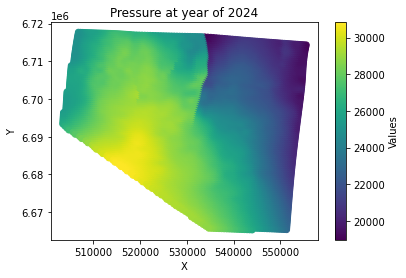

In [4]:
plt.scatter(df['X'], df['Y'], c=df['Pressure_2024-Jan-01'], cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pressure at year of 2024')
plt.show()

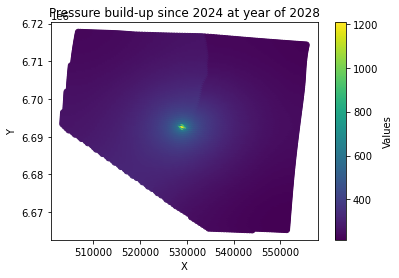

In [5]:
plt.scatter(df['X'], df['Y'], c=df['Pressure_2028-Jan-01']-df['Pressure_2024-Jan-01'], cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pressure build-up since 2024 at year of 2028')
plt.show()

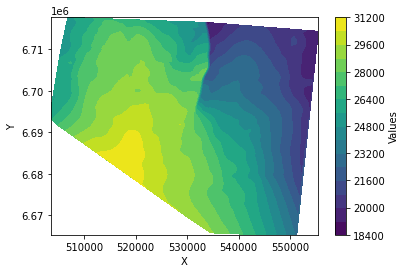

In [6]:
plt.tricontourf(df['X'], df['Y'], df['Pressure_2026-Jan-01'], levels=15, cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Method 2: when you still want to have your data in numpy format

- Do interpolations in 2D

In [7]:
from scipy.interpolate import griddata

def irreg_xy_to_arr(x, y, val, num_x, num_y, interp_method='cubic'):
    """
    interp_method = {‘linear’, ‘nearest’, ‘cubic’}
    num_x, num_y = int. Number of query pts along x or y axis.
    x, y, values = df columns
    """

    # Define grid
    xi = np.linspace(np.min(x), np.max(x), num_x)
    yi = np.linspace(np.min(y), np.max(y), num_y)
    x_new, y_new = np.meshgrid(xi, yi)

    val_new = griddata((x, y), val, (x_new, y_new), method=interp_method)

    return x_new, y_new, val_new


In [8]:
x_new, y_new, val_new = irreg_xy_to_arr(x=df['X'], y=df['Y'], val=df['Pressure_2024-Jan-01'], num_x=100, num_y=100, 
                                        interp_method='cubic')

In [9]:
x_new.shape, y_new.shape, val_new.shape

((100, 100), (100, 100), (100, 100))

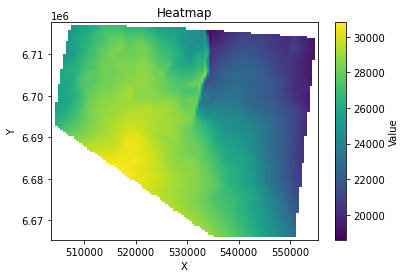

In [10]:
plt.imshow(val_new, extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap')
plt.show()

<ipython-input-12-ffa44ab1f3ce>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_new, y_new, val_new, cmap='viridis')


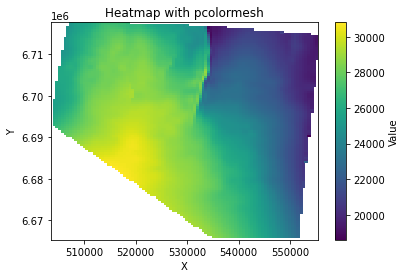

In [12]:
plt.pcolormesh(x_new, y_new, val_new, cmap='viridis')
plt.colorbar(label='Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap with pcolormesh')
plt.show()

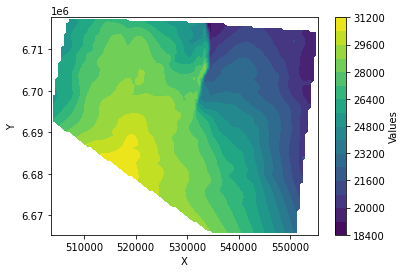

In [13]:
plt.contourf(x_new, y_new, val_new, levels=15, cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

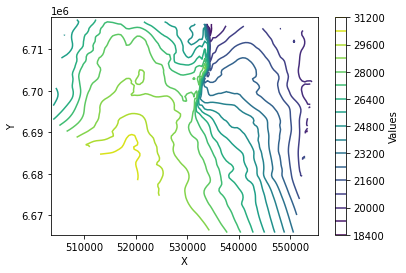

In [14]:
plt.contour(x_new, y_new, val_new, levels=15, cmap='viridis')
plt.colorbar(label='Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<ipython-input-15-7b842657eb63>:5: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(x_new, y_new, val_new, cmap='viridis')


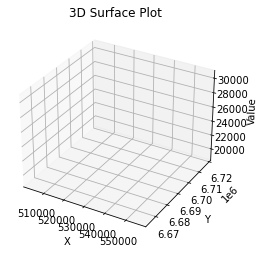

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_new, y_new, val_new, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Value')
plt.title('3D Surface Plot')
plt.show()